In [29]:

companies = ['INFY','INFIBEAM','HCLTECH','MINDTREE','TECHM','UNITECH','NIITTECH']

In [30]:
## Download the data
import quandl
data = dict()
for i in companies:
    f = quandl.get("NSE/"+i,auth_token='ioeU3XmkYVvTr2yqBWwy')
    data[i] = f['Close']  # we need closing prices only

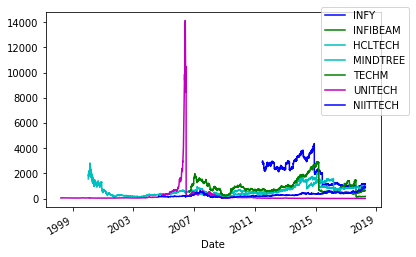

In [31]:


import pylab
import random as rn

colors = 'bcgmry'
rn.seed = len(companies)  # for choosing random colors
pylab.subplot('111')  # all time series on a single figure

for i in companies:
    data[i].plot(style=colors[rn.randint(0, len(colors) - 1)],label=i)
pylab.legend(bbox_to_anchor=(1.1, 1.05))
    
pylab.show()

In [40]:
## Compute correlation matrix

import numpy as np
n = len(companies)
corr_matrix = np.zeros((n, n))

for i in range(0, n):
    for j in range(0, n):
        if i < j:
            corr_matrix[i][j] = data[companies[i]].corr(
                                                    data[companies[j]],
                                                    method='pearson')

# Output
np.set_printoptions(precision=2)
print(corr_matrix)

[[ 0.   -0.34  0.3   0.28  0.7   0.73 -0.6 ]
 [ 0.    0.   -0.36 -0.58 -0.56 -0.29 -0.7 ]
 [ 0.    0.    0.    0.74  0.62 -0.06  0.59]
 [ 0.    0.    0.    0.    0.54 -0.21  0.45]
 [ 0.    0.    0.    0.    0.    0.2   0.1 ]
 [ 0.    0.    0.    0.    0.    0.   -0.13]
 [ 0.    0.    0.    0.    0.    0.    0.  ]]


In [41]:
## Remove weak correlations to construct a graph
threshold = 0.7
corr_matrix[np.where(abs(corr_matrix) < threshold)] = 0

# Output
print(corr_matrix)

[[ 0.    0.    0.    0.    0.7   0.73 -0.6 ]
 [ 0.    0.    0.    0.    0.    0.   -0.7 ]
 [ 0.    0.    0.    0.74  0.62  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.  ]]


In [42]:
# Constructing a graph
import networkx as nx
G = nx.Graph(corr_matrix)

In [43]:
## Explore graph properties

nodes, edges = G.order(), G.size()
print("Number of nodes:", nodes)
print("Number of edges:", edges)
print("Average degree:", edges / float(nodes))

Number of nodes: 7
Number of edges: 6
Average degree: 0.8571428571428571


In [44]:
## Count degrees

degrees = list(G.degree())
values = sorted(set(degrees))
values0 = [i[0] for i in values]
values1 = [i[1] for i in values]
counts = [values1.count(x) for x in values1]

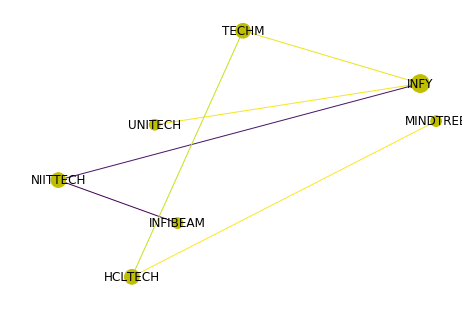

Smallest components (size < 3):
Companies with degrees < 3:
[('INFIBEAM', (1, 1)), ('HCLTECH', (2, 2)), ('MINDTREE', (3, 1)), ('TECHM', (4, 2)), ('UNITECH', (5, 1)), ('NIITTECH', (6, 2))]


In [47]:
# Connected components: color them differently
rn.seed = 5  # for choosing random colors
components = nx.connected_components(G)
for i in components:
    component = G.subgraph(i)
    nx.draw_random(component,
        node_color = colors[rn.randint(0, len(colors) - 1)],
        node_size = [component.degree(i) * 100 + 15
                     for i in component.nodes()],
        edge_color = [corr_matrix[i][j] * 0.5
                      for (i, j) in component.edges()],
        with_labels = True,
        labels = dict([(x, companies[x]) for x in component.nodes()])
        )
pylab.show()

print("Smallest components (size < 3):")
components = nx.connected_components(G)
for i in components:
    if len(i) < 3:
        print([companies[j] for j in i])

print("Companies with degrees < 3:")
print([(companies[i], degrees[i]) for i in range(0, n) if degrees[i][1] < 3])

In [38]:


import colorsys
ncolors = len(values)
HSV_tuples = [(x * 1.0 / ncolors, 0.5, 0.5) for x in range(ncolors)]
RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)

[1, 0, 1, 1, 0, 1, 0]
[4, 3, 4, 4, 3, 4, 3]


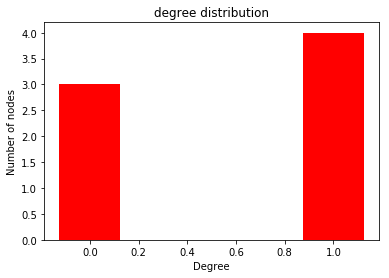

Highest degree: 1
Companies with highest degree:
INFY
HCLTECH
MINDTREE
UNITECH


In [39]:
# Plot degree distribution
import matplotlib.pyplot as plt

plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('degree distribution')
print(values1)
print(counts)

plt.bar(values1, counts, 0.25, color='r')

plt.show()

print("Highest degree:", max(values1))
highestDegree = max(values1)
print("Companies with highest degree:")
for i in values:
    if highestDegree == i[1]:
        print(companies[i[0]])